# Bank Customer Churn Rates

# Libraries and DataFrame

Data Source: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
!pip install eli5
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import eli5
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from eli5.sklearn import PermutationImportance

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('customer-churn-records.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

# Finding Missing Values

In [29]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
sns.heatmap(df.isnull(), cbar= False)

<Axes: >

# Descriptive Statistics

In [15]:
desc = df.describe()
var_row = df.var().to_frame().T
var_row.index = ['variance']
desc = desc.append(var_row)
desc

RowNumber    CustomerId   CreditScore           Age  \
count     1.000000e+04  1.000000e+04  10000.000000  10000.000000   
mean      5.000500e+03  1.569094e+07    650.528800     38.921800   
std       2.886896e+03  7.193619e+04     96.653299     10.487806   
min       1.000000e+00  1.556570e+07    350.000000     18.000000   
25%       2.500750e+03  1.562853e+07    584.000000     32.000000   
50%       5.000500e+03  1.569074e+07    652.000000     37.000000   
75%       7.500250e+03  1.575323e+07    718.000000     44.000000   
max       1.000000e+04  1.581569e+07    850.000000     92.000000   
variance  8.334167e+06  5.174815e+09   9341.860157    109.994084   

                Tenure       Balance  NumOfProducts     HasCrCard  \
count     10000.000000  1.000000e+04   10000.000000  10000.000000   
mean          5.012800  7.648589e+04       1.530200      0.705500   
std           2.892174  6.239741e+04       0.581654      0.455840   
min           0.000000  0.000000e+00       1.000000      0.000000   
25%           3.000000  0.000000e+00       1.000000      0.000000   
50%           5.000000  9.719854e+04       1.000000      1.000000   
75%           7.000000  1.276442e+05       2.000000      1.000000   
max          10.000000  2.508981e+05       4.000000      1.000000   
variance      8.364673  3.893436e+09       0.338322      0.207791   

          IsActiveMember  EstimatedSalary        Exited      Complain  \
count       10000.000000     1.000000e+04  10000.000000  10000.000000   
mean            0.515100     1.000902e+05      0.203800      0.204400   
std             0.499797     5.751049e+04      0.402842      0.403283   
min             0.000000     1.158000e+01      0.000000      0.000000   
25%             0.000000     5.100211e+04      0.000000      0.000000   
50%             1.000000     1.001939e+05      0.000000      0.000000   
75%             1.000000     1.493882e+05      0.000000      0.000000   
max             1.000000     1.999925e+05      1.000000      1.000000   
variance        0.249797     3.307457e+09      0.162282      0.162637   

          Satisfaction Score  Point Earned  
count           10000.000000  10000.000000  
mean                3.013800    606.515100  
std                 1.405919    225.924839  
min                 1.000000    119.000000  
25%                 2.000000    410.000000  
50%                 3.000000    605.000000  
75%                 4.000000    801.000000  
max                 5.000000   1000.000000  
variance            1.976607  51042.032975

# Outlier Detection

In [7]:
def detect_outliers(df):
    outliers=[]
    threshold=3.00
    mean=np.mean(df)
    std=np.std(df)
    for i in df:
        z_score= (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [9]:
len(detect_outliers(df['CreditScore']))

8

In [15]:
len(detect_outliers(df['EstimatedSalary']))

0

In [16]:
len(detect_outliers(df['Balance']))

0

In [17]:
len(detect_outliers(df['NumOfProducts']))

60

In [18]:
len(detect_outliers(df['Age']))

133

# Data Visualization

# Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

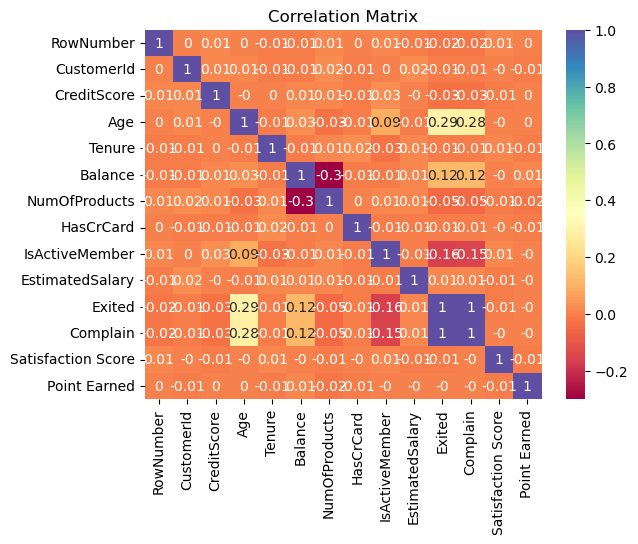

In [10]:
sns.heatmap(round(df.corr(), 2), cmap = "Spectral", annot = True)
plt.title('Correlation Matrix')

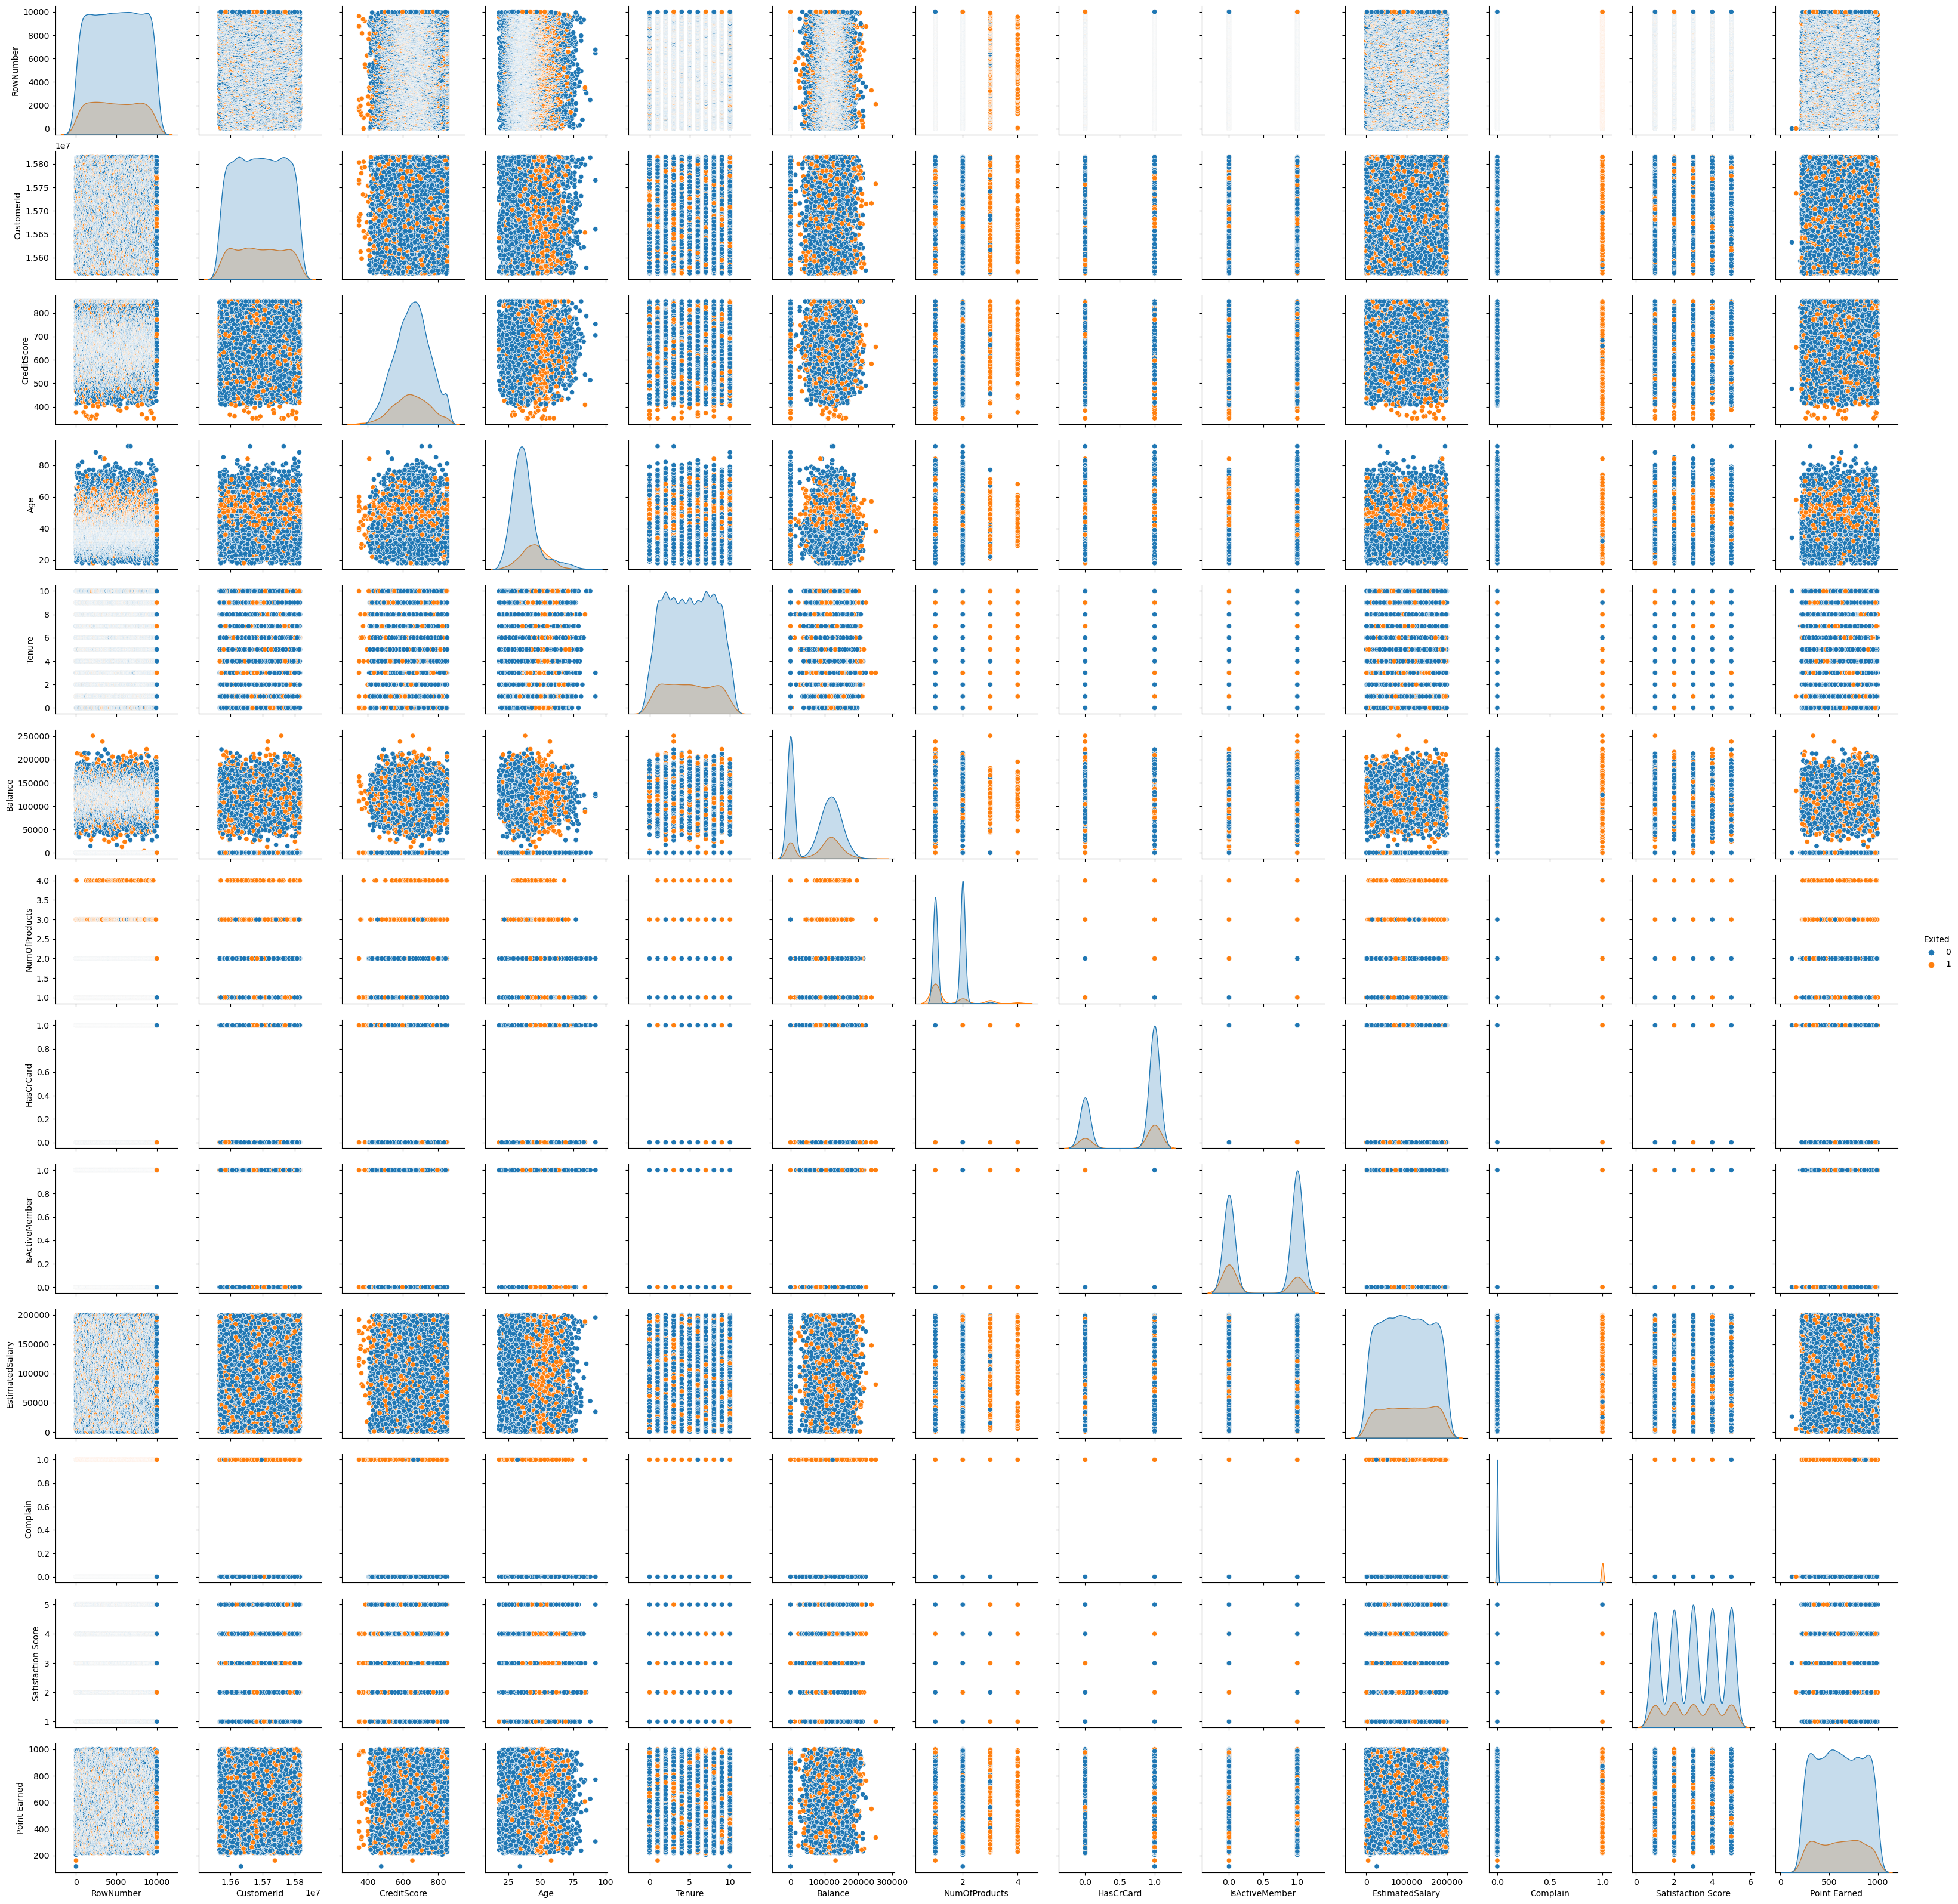

In [11]:
sns.pairplot(df, hue = 'Exited')

# Comparison of Complain and Exited

In [4]:
sns.set(style="whitegrid") 
ax = sns.countplot(x='Complain', hue = 'Exited', data = df) 
ax.set_title("Complain & Exited")

Text(0.5, 1.0, 'Complain & Exited')

# Exited vs Remaining Customer Balances

In [37]:
sns.set(style="whitegrid") 
g = sns.FacetGrid(df, col="Exited", margin_titles=True) 
ax  = g.map(plt.hist, "Balance", color="steelblue", bins = 15)

# Geography of Customers

In [38]:
fig1, ax1 = plt.subplots()
x = list(df['Geography'].value_counts().index) 
y = list(df['Geography'].value_counts())
ax1.pie(y, labels = x, autopct='%1.1f%%', startangle=90)
plt.title("Customer Geography")
plt.show() 

# Gender & Geography of Customers

In [6]:
sns.set(style="whitegrid") 
ax = sns.countplot(x=df['Geography'],hue = df['Gender']) 
ax.set_title("Gender & Geography")

Text(0.5, 1.0, 'Gender & Geography')

# Card Type & Georgraphy 

In [7]:
sns.set(style="whitegrid") 
ax = sns.countplot(x='Geography', hue = 'Card Type', data = df) 
ax.set_title("Card Type & Geography")

Text(0.5, 1.0, 'Card Type & Geography')

# Geography vs Credit Score

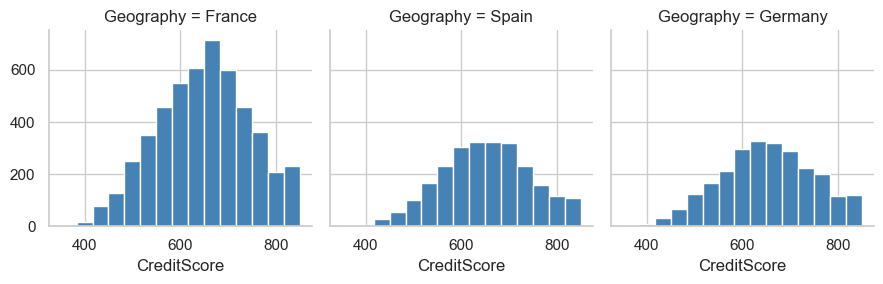

In [58]:
sns.set(style="whitegrid") 
g = sns.FacetGrid(df, col="Geography", margin_titles=True) 
ax  = g.map(plt.hist, "CreditScore", color="steelblue", bins = 15) 

# Distribution of Card Types 

In [57]:
sns.set(style="whitegrid") 
g = sns.FacetGrid(df, col="Card Type", margin_titles=True) 
ax  = g.map(plt.hist, "CreditScore", color="steelblue", bins = 15) 

## Data Processing

# Finding Zero Variance Variables

In [12]:
df.var() <0.0001

RowNumber             False
CustomerId            False
CreditScore           False
Age                   False
Tenure                False
Balance               False
NumOfProducts         False
HasCrCard             False
IsActiveMember        False
EstimatedSalary       False
Exited                False
Complain              False
Satisfaction Score    False
Point Earned          False
dtype: bool

In [13]:
df.drop(['RowNumber', 'Surname', 'CustomerId'], axis = 1, inplace = True)
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0          1               1        101348.88       1         1   
1          0               1        112542.58       0         1   
2          1               0        113931.57       1         1   
3          0               0         93826.63       0         0   
4          1               1         79084.10       0         0   

   Satisfaction Score Card Type  Point Earned  
0                   2   DIAMOND           464  
1                   3   DIAMOND           456  
2                   3   DIAMOND           377  
3                   5      GOLD           350  
4                   5      GOLD           425

In [15]:
Imputed = pd.get_dummies(df, drop_first = True)
X = Imputed.drop('Exited', axis = 1)
Y = Imputed.Exited

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_, columns = X.columns)

X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size = 0.3, random_state = 1)

#  Classification Models

Logistic Regression

In [19]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

y_pred_LR = logmodel.predict(X_test)

y_pred_prob_LR = logmodel.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(Y_test, y_pred_prob_LR))
print(confusion_matrix(Y_test, y_pred_LR))
print(classification_report(Y_test, y_pred_LR))

ROC AUC:  0.9991585292004481
[[2370    3]
 [   2  625]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2373
           1       1.00      1.00      1.00       627

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



Random Forest

In [20]:
rf_model = RandomForestClassifier(max_depth = 7, random_state = 1)
rf_model.fit(X_test, Y_test)

y_pred_rf = rf_model.predict(X_test)

y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(Y_test, y_pred_prob_rf))
print(confusion_matrix(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))

ROC AUC:  0.9999993278987224
[[2373    0]
 [   1  626]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2373
           1       1.00      1.00      1.00       627

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



k-NN Model

In [21]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)

y_pred_prob_knn = knn.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(Y_test, y_pred_prob_knn))
print(confusion_matrix(Y_test,y_pred_knn))
print(classification_report(Y_test,y_pred_knn))

ROC AUC:  0.99767822613654
[[2370    3]
 [  10  617]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2373
           1       1.00      0.98      0.99       627

    accuracy                           1.00      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000



In [39]:
max_K = 100
cv_scores = []

for K in range (1, max_K):
  knn = KNeighborsClassifier(n_neighbors = K)
  scores = cross_val_score(knn,X_train,Y_train.values.ravel(), cv = 5, scoring = "roc_auc" )
  cv_scores.append(scores.mean())

ax = sns.lineplot( x = range(1, max_K), y = cv_scores)
ax.set(xlabel = "K", ylabel = "ROC AUC")
ax

<Axes: xlabel='K', ylabel='ROC AUC'>

In [40]:
max(cv_scores)

0.9989772982314274

In [44]:
cv_scores[-10:]

[0.9988472605031122,
 0.9989772982314274,
 0.9989760370422772,
 0.9989706516440284,
 0.9989605110231914,
 0.9989541757533871,
 0.9989408641463274,
 0.9989285015729932,
 0.9989205778776723,
 0.9989110732973059]

Optmized k-NN

In [49]:
knn1 = KNeighborsClassifier(n_neighbors=92, metric='euclidean')
knn1.fit(X_train, Y_train)

y_pred_knn1 = knn1.predict(X_test)

y_pred_prob_knn1 = knn1.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(Y_test, y_pred_prob_knn1))
print(confusion_matrix(Y_test,y_pred_knn1))
print(classification_report(Y_test,y_pred_knn1))

ROC AUC:  0.9996189185756024
[[2371    2]
 [  72  555]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2373
           1       1.00      0.89      0.94       627

    accuracy                           0.98      3000
   macro avg       0.98      0.94      0.96      3000
weighted avg       0.98      0.98      0.97      3000



Boosted Tree

In [56]:
bt_model = AdaBoostClassifier(n_estimators = 100)
bt_model.fit(X_train, Y_train)

y_pred_bt = bt_model.predict(X_test)

y_pred_prob_bt = bt_model.predict_proba(X_test)[:, 1]

print('ROC AUC: ', roc_auc_score(Y_test, y_pred_prob_bt))
print(confusion_matrix(Y_test, y_pred_bt))
print(classification_report(Y_test, y_pred_bt))

ROC AUC:  0.9986571416473605
[[2370    3]
 [   2  625]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2373
           1       1.00      1.00      1.00       627

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



Naive Model

In [50]:
nb_model = MultinomialNB(alpha = 0.1)
nb_model.fit(X_train, Y_train)

y_pred_nb = nb_model.predict(X_test)
y_pred_prob_nb = nb_model.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(Y_test, y_pred_prob_nb))
print(confusion_matrix(Y_test, y_pred_nb))
print(classification_report(Y_test, y_pred_nb))

ROC AUC:  0.9993655363939481
[[2370    3]
 [   2  625]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2373
           1       1.00      1.00      1.00       627

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



Artifical Neural Network

In [51]:
MLPC_model = MLPClassifier(hidden_layer_sizes = 20, activation = 'logistic', solver = 'adam', max_iter = 1000, random_state = 1)
MLPC_model.fit(X_train, Y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print("ROC AUC: ", roc_auc_score(Y_test, MLPC_model.predict_proba(X_test)[:,1]))
print(confusion_matrix(Y_test, y_pred_mlpc))
print(classification_report(Y_test, y_pred_mlpc))

ROC AUC:  0.9996834402982516
[[2370    3]
 [   2  625]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2373
           1       1.00      1.00      1.00       627

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [52]:
min_hidden_layer_size = 5
max_hidden_layer_size = 50
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes= s, activation='logistic', solver='lbfgs', max_iter = 2000, random_state=1)
    scores = cross_val_score(MLPC_model,X_train,Y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

In [53]:
plot = sns.lineplot(x = range(min_hidden_layer_size, max_hidden_layer_size, 5), y = cv_scores)
plot.set(xlabel = 'Hidden Layer Size', ylabel = 'ROC AUC')

[Text(0.5, 0, 'Hidden Layer Size'), Text(0, 0.5, 'ROC AUC')]

In [54]:
Opt_MLPC_model = MLPClassifier(hidden_layer_sizes = 10, activation = 'logistic', solver = 'adam', max_iter = 1000, random_state = 1)
Opt_MLPC_model.fit(X_train, Y_train)

y_pred_mlpc = Opt_MLPC_model.predict(X_test)

print("ROC AUC: ", roc_auc_score(Y_test, Opt_MLPC_model.predict_proba(X_test)[:,1]))
print(confusion_matrix(Y_test, y_pred_mlpc))
print(classification_report(Y_test, y_pred_mlpc))

ROC AUC:  0.999709652248078
[[2370    3]
 [   2  625]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2373
           1       1.00      1.00      1.00       627

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



# Roc Curves for All Models

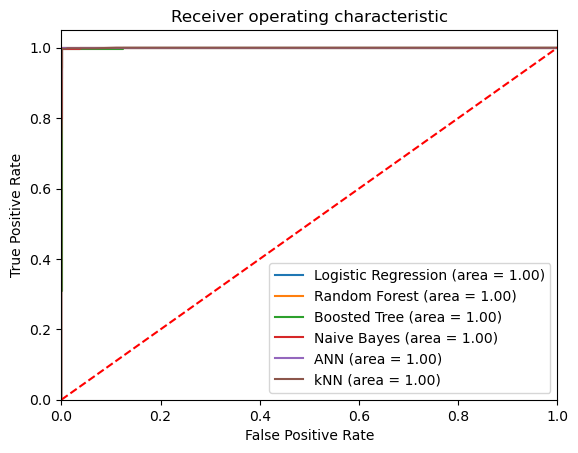

In [57]:
lr_roc_auc = roc_auc_score(Y_test, logmodel.predict_proba(X_test)[:,1])
lr_fpr, lr_tpr, threshold = roc_curve(Y_test, y_pred_prob_rf)
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression (area = %0.2f)' %lr_roc_auc)
rf_roc_auc = roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, threshold = roc_curve(Y_test, y_pred_prob_rf)
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest (area = %0.2f)' %rf_roc_auc)
bt_roc_auc = roc_auc_score(Y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, threshold = roc_curve(Y_test, y_pred_prob_bt)
plt.plot(bt_fpr, bt_tpr, label = 'Boosted Tree (area = %0.2f)' %bt_roc_auc)
nb_roc_auc = roc_auc_score(Y_test, nb_model.predict_proba(X_test)[:,1])
nb_fpr, nb_tpr, threshold = roc_curve(Y_test, y_pred_prob_nb)
plt.plot(nb_fpr, nb_tpr, label = 'Naive Bayes (area = %0.2f)' %nb_roc_auc)
ann_roc_auc = roc_auc_score(Y_test, Opt_MLPC_model.predict_proba(X_test)[:,1])
ann_fpr, ann_tpr, threshold = roc_curve(Y_test, Opt_MLPC_model.predict_proba(X_test)[:,1])
plt.plot(ann_fpr, ann_tpr, label = 'ANN (area = %0.2f)' %ann_roc_auc)
knn_roc_auc = roc_auc_score(Y_test, knn1.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, threshold = roc_curve(Y_test, y_pred_prob_knn1)
plt.plot(knn_fpr, knn_tpr, label = 'kNN (area = %0.2f)' %knn_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.figure
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

Due to multiple metrics being 1.00 across various models, it would be desirable to get a larger dataset to get more realistic results. This is because every model is is predicting near perfect results which could be the due to overfitting. Consequently, getting a larger dataset would be helping in shaping these models to become more applicable to real-world bank churn data.

In [60]:
!pip install xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance
model = XGBClassifier()
model.fit(X_rescaled, Y)

plot_importance(model)


     ---------------------------------------- 99.7/99.7 MB 7.2 MB/s eta 0:00:00


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>